In [34]:
# Data Preprocessing

In [35]:
#importing tje liberies

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# import the data trining

In [40]:
with open ('SPY1.csv') as data_train:
    #print(data_train)
    dataset_train = pd.read_csv('SPY1.csv')

# the relevant col is [date,open] 
training_set = dataset_train.iloc[:, 1:2].values


In [41]:
#feature scalling

In [42]:
#import libary to normalize (0-1) the price
 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [44]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 735):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [45]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
#Building and Training the RNN
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [47]:
#Initialising the RNN
regressor = Sequential()

In [48]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [49]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [50]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [51]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [52]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [53]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
22/22 [==============================] - 6s 55ms/step - loss: 0.0578
Epoch 2/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0122
Epoch 3/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0086
Epoch 4/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0061
Epoch 5/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0057
Epoch 6/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0066
Epoch 7/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0057
Epoch 8/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0061
Epoch 9/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0053
Epoch 10/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0063
Epoch 11/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0057
Epoch 12/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0067
Epoch 13/100
22/22 [=====

In [55]:
#Making the predictions and visualising the results

In [56]:
#Getting the real stock price jan 13 - feb 13
dataset_test = pd.read_csv('SPY2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [57]:
#Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

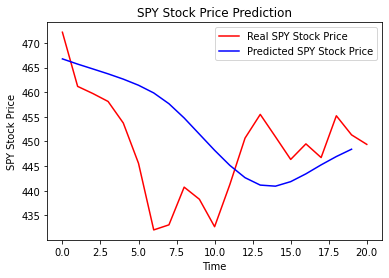

In [58]:
#Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real SPY Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SPY Stock Price')
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()